### 1. Data Acquisition

#### Import Libraries

In [1]:
# data analysis and wrangling
import pandas as pd
from pandas import DataFrame, Series
import numpy as np

In [2]:
pd.options.mode.chained_assignment = None  # default='warn'

In [3]:
# data exploration
from IPython.display import display
from pandas import crosstab

In [4]:
# data visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [5]:
# data modeling
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

### Read the Data

In [6]:
train = pd.read_csv("Dataset/train.csv")
test = pd.read_csv("Dataset/test.csv")

In [7]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Understand the Data

Check for duplicated data:

In [10]:
train.loc[train["PassengerId"].duplicated()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


There was no duplicated data in train dataframe.

List the information on the dataset:

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


Percentage of Missingness among the datapoints:

In [9]:
total = train.isnull().sum().sort_values(ascending = False)

In [10]:
percent1 = (train.isnull().sum()/train.isnull().count())*100

In [11]:
percent2 = (round(percent1, 1)).sort_values(ascending = False)

In [12]:
missing_data = pd.concat([total, percent2], axis = 1, keys = ["Total", "Percentage (%)"])

In [13]:
missing_data.head()

,Total,Percentage (%)
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
Fare,0,0.0
Ticket,0,0.0


There were Nan values in Cabin and Age observations. Cabin observation needs to be dropped from the dataset since it has more than 50% of the missing values.
Sex and Embarked categorical observations need to be converted into numerical observations.

### 2. Data Cleaning

#### Drop "Cabin" Observation

In [14]:
#train.drop(columns = ["Cabin"], axis = 1, inplace = True)

In [15]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Impute Missing Value for "Age"

Find the average, std, and number of NaN values in train

In [16]:
average_age_train = train["Age"].mean()
std_age_train = train["Age"].std()
nan_age_train = train["Age"].isna().sum()

Find the average, std, and number of NaN values in test

In [17]:
average_age_test = test["Age"].mean()
std_age_test = test["Age"].std()
nan_age_test = test["Age"].isna().sum()

Generate random numbers between (mean - std) & (mean + std)

In [18]:
rand_age_train = np.random.randint(average_age_train - std_age_train, average_age_train + std_age_train, size = nan_age_train)

In [19]:
rand_age_test = np.random.randint(average_age_test - std_age_test, average_age_test + std_age_test, size = nan_age_test)

#### Impute the random numbers for "Age" into train and test dataframe

In [20]:
train["Age"][np.isnan(train["Age"])] = rand_age_train

In [21]:
train["Age"] = train["Age"].astype(int)

In [22]:
train["Age"].isna().sum()

0

In [23]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    int32  
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(1), int32(1), int64(5), object(5)
memory usage: 62.7+ KB


In [24]:
test["Age"][np.isnan(test["Age"])] = rand_age_test

In [25]:
test["Age"] = test["Age"].astype(int)

In [26]:
test["Age"].isna().sum()

0

In [27]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    int32  
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(1), int32(1), int64(4), object(5)
memory usage: 26.2+ KB


#### Impute the random numbers for "Fare" into test dataframe

Find the average, std, and number of NaN values in test

In [28]:
average_fare_test = test["Fare"].mean()
std_fare_test = test["Fare"].std()
nan_fare_test = test["Fare"].isna().sum()

In [29]:
rand_fare_test = np.random.randint(average_fare_test - std_fare_test, average_fare_test + std_fare_test, size = nan_fare_test)

In [30]:
test["Fare"][np.isnan(test["Fare"])] = rand_fare_test

In [31]:
test["Fare"] = test["Fare"].astype(int)

In [32]:
test["Fare"].isna().sum()

0

In [33]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  418 non-null    int64 
 1   Pclass       418 non-null    int64 
 2   Name         418 non-null    object
 3   Sex          418 non-null    object
 4   Age          418 non-null    int32 
 5   SibSp        418 non-null    int64 
 6   Parch        418 non-null    int64 
 7   Ticket       418 non-null    object
 8   Fare         418 non-null    int32 
 9   Cabin        91 non-null     object
 10  Embarked     418 non-null    object
dtypes: int32(2), int64(4), object(5)
memory usage: 24.6+ KB


#### Impute Missing Value for "Embarked" in train dataframe

There were two missing values in "Embarked", therefore, the values will be imputed with the most occured value(mode) which was "S".

In [14]:
#Find Mode in Embarked dataset
train.groupby(["Embarked"])["PassengerId"].count()

Embarked
C    168
Q     77
S    644
Name: PassengerId, dtype: int64

In [34]:
#Method 1:
train["Embarked"] = train["Embarked"].fillna("S")

#Method 2:\
train["Embarked"] = train["Embarked"].replace(to_replace = np.nan, value = "S")

In [35]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    int32  
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(1), int32(1), int64(5), object(5)
memory usage: 62.7+ KB


source: https://towardsdatascience.com/predicting-the-survival-of-titanic-passengers-30870ccc7e8

#### Check for Outliers

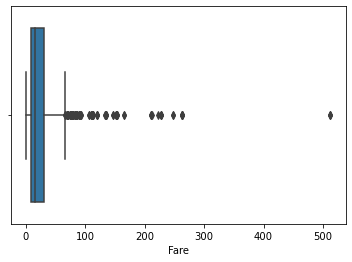

In [36]:
#detect outliers for time
sns.boxplot(x = train.Fare)
plt.show()

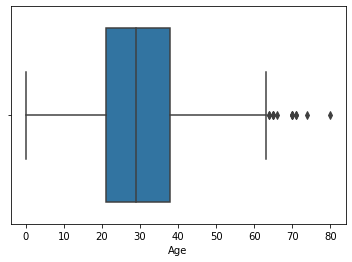

In [37]:
#detect outliers for time
sns.boxplot(x = train.Age)
plt.show()

There were outliers detected in Fare and Age observations, however, these outliers were important to determine the survival of the passengers. Therefore, the outliers must not be dropped.

### 3. Data Exploration (EDA) and Data Visualization

#### 3.1 Pclass

#### Find Average of Survival based on Pclass

In [38]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


In [39]:
count_class = display(train.groupby(["Pclass"])["Survived"].mean().sort_values().to_frame())

,Survived
Pclass,
3,0.242363
2,0.472826
1,0.629630


In [40]:
pd.crosstab(train["Pclass"], train["Survived"], margins = True)

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


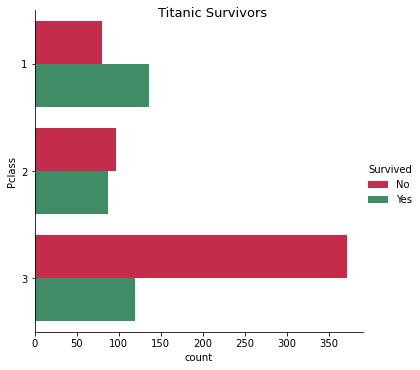

In [41]:
myFigure = sns.catplot(y = "Pclass", hue = "Survived", kind = "count", palette = ["crimson", "#339966"], data = train)
myFigure.fig.suptitle("Titanic Survivors", fontsize = 13)
myFigure._legend.texts[0].set_text("No")
myFigure._legend.texts[1].set_text("Yes")

In [42]:
pieplot_class = train.groupby("Pclass")["Survived"].mean()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x122D0CD0>],
      dtype=object)

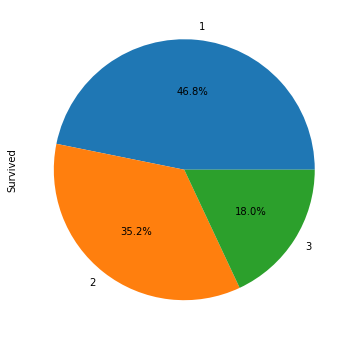

In [43]:
pieplot_class.plot.pie(subplots = True, figsize = (10, 6), autopct='%1.1f%%')

Pclass 1 was most likely to survive while Pclass 3 was not.

#### 3.2 Title in Society

#### Find Average of Survival based on Title in Society

In [44]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


#### Split the Name

In [45]:
def get_name(Name):
    return Name.split(",")[1].split(" ")[1]

train["Title"] = train["Name"].apply(lambda x: f"{get_name(x)}")

#### Rearrange the Columns

In [46]:
cols = train.columns.tolist()
cols = cols[:3] + cols[-1:] + cols[3:-1]
cols

['PassengerId',
 'Survived',
 'Pclass',
 'Title',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [47]:
train = train[cols]
train.head(5)

,PassengerId,Survived,Pclass,Title,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Mr.,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,Mrs.,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,Miss.,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,Mrs.,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,Mr.,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


#### Check which Passenger belongs to the Title

In [48]:
train[train["Title"].str.contains("Don")]

,PassengerId,Survived,Pclass,Title,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
30,31,0,1,Don.,"Uruchurtu, Don. Manuel E",male,40,0,0,PC 17601,27.7208,NaN,C


In [49]:
train[train["Title"].str.contains("the")]

,PassengerId,Survived,Pclass,Title,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
759,760,1,1,the,"Rothes, the Countess. of (Lucy Noel Martha Dye...",female,33,0,0,110152,86.5,B77,S


In [50]:
count_title = display(train.groupby(["Title"])["Survived"].mean().sort_values().to_frame())

,Survived
Title,
Capt.,0.000000
Don.,0.000000
Jonkheer.,0.000000
Rev.,0.000000
Mr.,0.156673
Dr.,0.428571
Col.,0.500000
Major.,0.500000
Master.,0.575000


Capt. (titanic's Captain), Don. (the title for Mexican-American's senior citizen), Jonkheer (the title for lowest rank in nobility) and Rev. (the title for Christian clergy) were most likely to die in the disaster. 

In [51]:
count_titleclass = display(train.groupby(["Title", "Sex", "Pclass"])["Survived"].mean().to_frame())

Survived
Title     Sex    Pclass          
Capt.     male   1       0.000000
Col.      male   1       0.500000
Don.      male   1       0.000000
Dr.       female 1       1.000000
          male   1       0.500000
                 2       0.000000
Jonkheer. male   1       0.000000
Lady.     female 1       1.000000
Major.    male   1       0.500000
Master.   male   1       1.000000
                 2       1.000000
                 3       0.392857
Miss.     female 1       0.956522
                 2       0.941176
                 3       0.500000
Mlle.     female 1       1.000000
Mme.      female 1       1.000000
Mr.       male   1       0.345794
                 2       0.087912
                 3       0.112853
Mrs.      female 1       0.976190
                 2       0.902439
                 3       0.500000
Ms.       female 2       1.000000
Rev.      male   2       0.000000
Sir.      male   1       1.000000
the       female 1       1.000000

Female (Miss and Mrs.) have bigger chance in surviving although they belonged to Pclass 3. Were females have been prioritized to be saved regardless of their class?

#### 3.3 Sex

#### Find Average of Survival based on Sex

In [52]:
train.head(5)

,PassengerId,Survived,Pclass,Title,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Mr.,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,Mrs.,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,Miss.,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,Mrs.,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,Mr.,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


In [53]:
count_sex = display(train.groupby(["Sex"])["Survived"].mean().sort_values().to_frame())

,Survived
Sex,
male,0.188908
female,0.742038


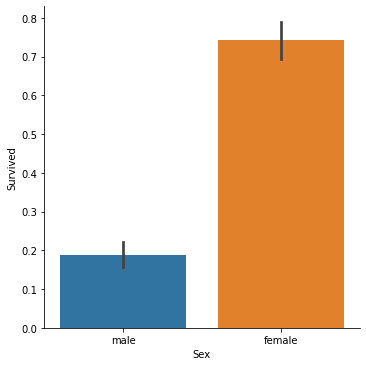

In [54]:
sns.catplot(x = "Sex", y = "Survived", kind = "bar", data = train)

#### The Relation between Class and Sex to Survival

In [55]:
count_sexclass = pd.crosstab([train["Sex"], train["Pclass"]], train.Survived, margins = True)

In [56]:
count_sexclass

Survived         0    1  All
Sex    Pclass               
female 1         3   91   94
       2         6   70   76
       3        72   72  144
male   1        77   45  122
       2        91   17  108
       3       300   47  347
All            549  342  891

Yes, females have greater chance in surviving compared to males regardless of class.

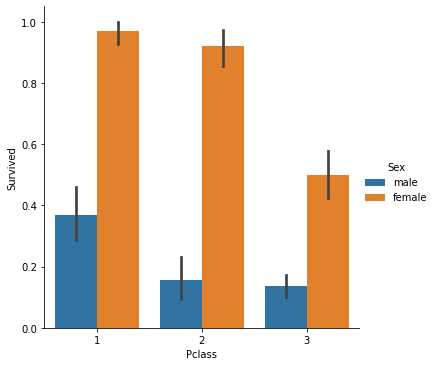

In [57]:
sns.catplot(x = "Pclass", y = "Survived", hue = "Sex", kind = "bar", data = train)

Regardless of Pclass, female passengers have higher chance of survival compared to male passengers.

#### 3.4 Age

#### The Overall Survival based on Age Distribution

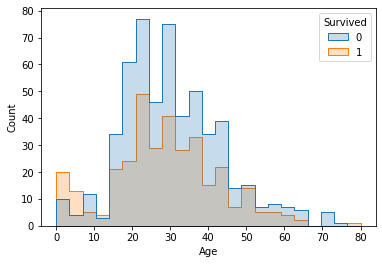

In [58]:
sns.histplot(data = train, x = "Age", hue = "Survived", element = "step")

#### Find Average of Survival based on Age Band

In [59]:
from pandas import qcut

Since Age is continuous, therefore, Age can be changed into ordinal by using pandas.qcut

In [60]:
train["Age Band"] = pd.qcut(train["Age"], 4)

In [61]:
count_age = display(train.groupby(["Age Band"])["Survived"].mean().sort_values().to_frame())

,Survived
Age Band,
"(38.0, 80.0]",0.355450
"(21.0, 29.0]",0.383260
"(-0.001, 21.0]",0.396761
"(29.0, 38.0]",0.398058


The passengers who aged less than 40 years old were moslt likely to survive from the disaster.

In [62]:
count_sexage = pd.crosstab([train["Sex"], train["Age Band"]], train.Survived, margins = True)

In [63]:
count_sexage

Survived                 0    1  All
Sex    Age Band                     
female (-0.001, 21.0]   32   64   96
       (21.0, 29.0]     19   60   79
       (29.0, 38.0]     11   57   68
       (38.0, 80.0]     19   52   71
male   (-0.001, 21.0]  117   34  151
       (21.0, 29.0]    121   27  148
       (29.0, 38.0]    113   25  138
       (38.0, 80.0]    117   23  140
All                    549  342  891

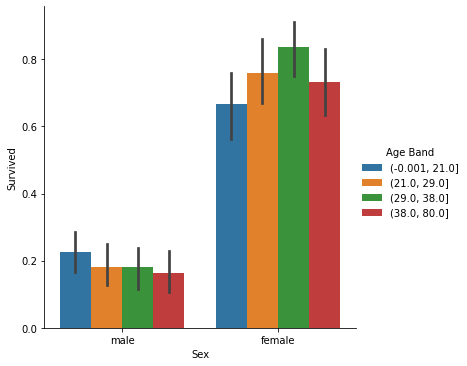

In [64]:
sns.catplot(data = train, x = "Sex", y = "Survived", hue = "Age Band", kind = "bar")


Male passengers below than 21 years old and female passengers between 28-37 years old have greater chance at surviving.

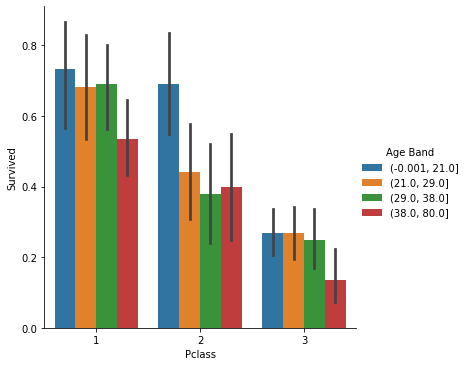

In [65]:
sns.catplot(data = train, x = "Pclass", y = "Survived", hue = "Age Band", kind = "bar")

Overall, young passengers (less than 40 years old) were most likely to survive. As can be seen in the Titanic movie, young passengers regardless of class have been prioritized to be stationed into the life-saving boat. Let's look at the impact of family size to the survival.

#### 3.5 Family Size

#### Find Average of Survival based on Family Size

In [66]:
train.head(5)

,PassengerId,Survived,Pclass,Title,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age Band
0,1,0,3,Mr.,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,"(21.0, 29.0]"
1,2,1,1,Mrs.,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,"(29.0, 38.0]"
2,3,1,3,Miss.,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,"(21.0, 29.0]"
3,4,1,1,Mrs.,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,"(29.0, 38.0]"
4,5,0,3,Mr.,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,"(29.0, 38.0]"


#### Create Family Size Column

In [67]:
train["Family Size"] = train["SibSp"] + train["Parch"]
test["Family Size"] = test["SibSp"] + test["Parch"]

#### Rearrange Columns

In [68]:
cols = train.columns.tolist()
cols = cols[:8] + cols[-1:] + cols[8:-1]
cols

['PassengerId',
 'Survived',
 'Pclass',
 'Title',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Family Size',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked',
 'Age Band']

In [69]:
train = train[cols]
train.head(5)

,PassengerId,Survived,Pclass,Title,Name,Sex,Age,SibSp,Family Size,Parch,Ticket,Fare,Cabin,Embarked,Age Band
0,1,0,3,Mr.,"Braund, Mr. Owen Harris",male,22,1,1,0,A/5 21171,7.2500,NaN,S,"(21.0, 29.0]"
1,2,1,1,Mrs.,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,1,0,PC 17599,71.2833,C85,C,"(29.0, 38.0]"
2,3,1,3,Miss.,"Heikkinen, Miss. Laina",female,26,0,0,0,STON/O2. 3101282,7.9250,NaN,S,"(21.0, 29.0]"
3,4,1,1,Mrs.,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,1,0,113803,53.1000,C123,S,"(29.0, 38.0]"
4,5,0,3,Mr.,"Allen, Mr. William Henry",male,35,0,0,0,373450,8.0500,NaN,S,"(29.0, 38.0]"


#### The Overall Survival based on Family Size

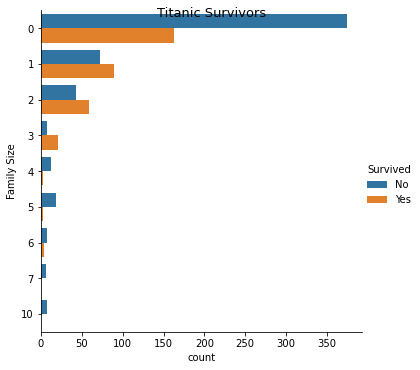

In [70]:
myFigure = sns.catplot(y = "Family Size", hue = "Survived", kind = "count", data = train)
myFigure.fig.suptitle("Titanic Survivors", fontsize = 13)
myFigure._legend.texts[0].set_text("No")
myFigure._legend.texts[1].set_text("Yes")

Those who came alone (family size = 0) did not have a great chance to survive. However, didn't those who came alone were supposed to manage to save themselves since they did not have the responsibility to save other family members? That's interesting...

#### The Relation between Family Size and Class

In [71]:
pd.crosstab([train["Family Size"], train["Age Band"]], train.Survived, margins = True)

Survived                      0    1  All
Family Size Age Band                     
0           (-0.001, 21.0]   89   31  120
            (21.0, 29.0]    100   53  153
            (29.0, 38.0]     94   43  137
            (38.0, 80.0]     91   36  127
1           (-0.001, 21.0]   14   24   38
            (21.0, 29.0]     21   19   40
            (29.0, 38.0]     17   22   39
            (38.0, 80.0]     20   24   44
2           (-0.001, 21.0]   11   27   38
            (21.0, 29.0]     10    8   18
            (29.0, 38.0]     11   11   22
            (38.0, 80.0]     11   13   24
3           (-0.001, 21.0]    2   11   13
            (21.0, 29.0]      5    4    9
            (29.0, 38.0]      1    5    6
            (38.0, 80.0]      0    1    1
4           (-0.001, 21.0]    6    2    8
            (21.0, 29.0]      3    0    3
            (38.0, 80.0]      3    1    4
5           (-0.001, 21.0]   14    0   14
            (21.0, 29.0]      0    3    3
            (38.0, 80.0]      5    0    5
6           (-0.001, 21.0]    6    3    9
            (29.0, 38.0]      0    1    1
            (38.0, 80.0]      2    0    2
7           (-0.001, 21.0]    5    0    5
            (38.0, 80.0]      1    0    1
10          (-0.001, 21.0]    2    0    2
            (21.0, 29.0]      1    0    1
            (29.0, 38.0]      1    0    1
            (38.0, 80.0]      3    0    3
All                         549  342  891

Regardless of age, those who came lone rangers still did not have a chance to survival. Was it because of the class they belonged to?

In [72]:
alone = train[train["Family Size"] == 0]

In [73]:
count_alone = pd.crosstab([alone["Pclass"], alone["Age Band"]], alone.Survived, margins = True)

In [74]:
count_alone.head(20)

Survived                 0    1  All
Pclass Age Band                     
1      (-0.001, 21.0]    3    4    7
       (21.0, 29.0]      8   16   24
       (29.0, 38.0]     12   20   32
       (38.0, 80.0]     28   18   46
2      (-0.001, 21.0]   10    7   17
       (21.0, 29.0]     20    9   29
       (29.0, 38.0]     20   11   31
       (38.0, 80.0]     18    9   27
3      (-0.001, 21.0]   76   20   96
       (21.0, 29.0]     72   28  100
       (29.0, 38.0]     62   12   74
       (38.0, 80.0]     45    9   54
All                    374  163  537

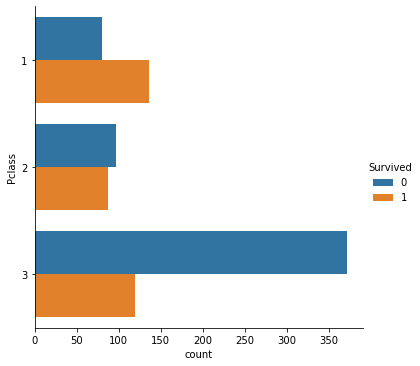

In [75]:
sns.catplot(y = "Pclass", hue = "Survived", kind = "count", data = train)

See! These lone rangers were majority from Pclass 3. Either young or old, they did not stand a chance compared to those who were from Pclass 1 and Pclass 2.

In [76]:
bigfamily = train[train["Family Size"] == 10]

In [77]:
count_bigfamily = pd.crosstab([bigfamily["Pclass"], bigfamily["Age Band"]], bigfamily.Survived, margins = True)

In [78]:
count_bigfamily.tail(20)

Survived               0  All
Pclass Age Band              
3      (-0.001, 21.0]  2    2
       (21.0, 29.0]    1    1
       (29.0, 38.0]    1    1
       (38.0, 80.0]    3    3
All                    7    7

Bigger size families were mostly coming from Plass 3. Both factors were deadly to the chance of survival.

#### 3.6 Fare

#### Find Average of Survival based on Fare

In [79]:
train.head(5)

,PassengerId,Survived,Pclass,Title,Name,Sex,Age,SibSp,Family Size,Parch,Ticket,Fare,Cabin,Embarked,Age Band
0,1,0,3,Mr.,"Braund, Mr. Owen Harris",male,22,1,1,0,A/5 21171,7.2500,NaN,S,"(21.0, 29.0]"
1,2,1,1,Mrs.,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,1,0,PC 17599,71.2833,C85,C,"(29.0, 38.0]"
2,3,1,3,Miss.,"Heikkinen, Miss. Laina",female,26,0,0,0,STON/O2. 3101282,7.9250,NaN,S,"(21.0, 29.0]"
3,4,1,1,Mrs.,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,1,0,113803,53.1000,C123,S,"(29.0, 38.0]"
4,5,0,3,Mr.,"Allen, Mr. William Henry",male,35,0,0,0,373450,8.0500,NaN,S,"(29.0, 38.0]"


Since Fare is continuous, therefore, Fare can be turned into ordinal by using pandas.qcut

In [80]:
train["Fare Band"] = pd.qcut(train["Fare"], 4)

In [81]:
count_fare = display(train.groupby(["Fare Band"])["Survived"].mean().sort_values().to_frame())

,Survived
Fare Band,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


In [82]:
count_fareclass = pd.crosstab([train["Pclass"], train["Fare Band"]], train.Survived, margins = True)

In [83]:
count_fareclass

Survived                  0    1  All
Pclass Fare Band                     
1      (-0.001, 7.91]     6    0    6
       (14.454, 31.0]    24   27   51
       (31.0, 512.329]   50  109  159
2      (-0.001, 7.91]     6    0    6
       (7.91, 14.454]    53   33   86
       (14.454, 31.0]    28   42   70
       (31.0, 512.329]   10   12   22
3      (-0.001, 7.91]   167   44  211
       (7.91, 14.454]   103   35  138
       (14.454, 31.0]    69   32  101
       (31.0, 512.329]   33    8   41
All                     549  342  891

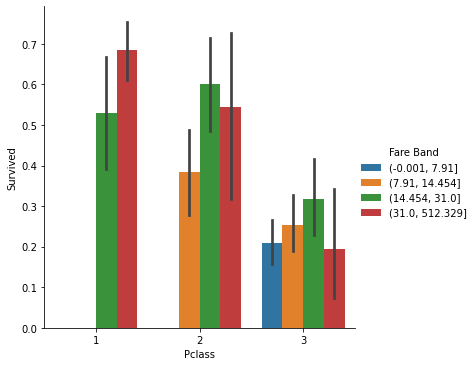

In [84]:
sns.catplot(data = train, x = "Pclass", y = "Survived", hue = "Fare Band", kind = "bar")

The passengers that purchased the most expensive first class ticket were most likely to survive.

#### 3.7 Embarked

#### Find the Average of Survival based on Embarked

In [85]:
count_embarked = display(train.groupby(["Embarked"])["Survived"].mean().sort_values().to_frame())

,Survived
Embarked,
S,0.339009
Q,0.389610
C,0.553571


The passengers that embarked in port C have higher chance of survival. Why so? Let's take a look at which majority of economical class embarked at port c.

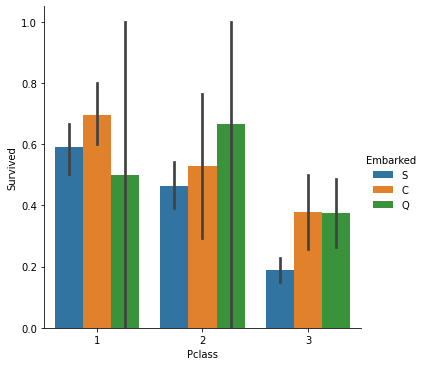

In [86]:
sns.catplot(x = "Pclass", y = "Survived", hue = "Embarked", kind = "bar", data = train)

The majority of passengers at port C have been occupied by those were from Pclass 1 and 2. We have analyzed the relation between Pclass and embarked port to survival, let's see the relation between gender and embarked port to survival, especially on embarked port C.

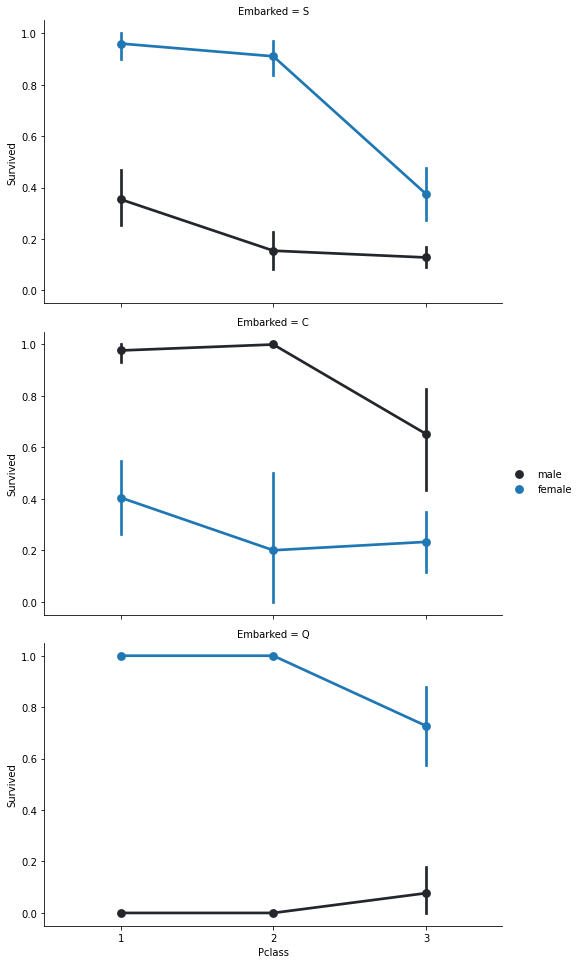

In [87]:
embarkedsex = sns.FacetGrid(train, row = "Embarked", height = 4.5, aspect = 1.6)
embarkedsex.map(sns.pointplot, "Pclass", "Survived", "Sex", palette = None, order = None, hue_order = None)
embarkedsex.add_legend()

What a surprise! Male passengers were the majority passengers embarked at port C and survived! We have seen previously that male passerngers have no luck against female passengers when it comes to survival. Does it mean male passengers were most likely to survive if they have embarked at port C instead?

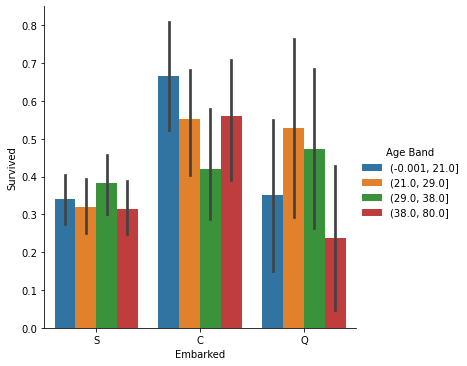

In [88]:
sns.catplot(x = "Embarked", y = "Survived", hue = "Age Band", kind = "bar", data = train)

As been discussed before, male passengers might have the chance to survive if they were aged less than 21 years old. They did not have luck in surviving overall....

### Conclusion

In a conclusion, female passengers have greater chance at surviving compared to male passengers. The priority of surviving female would be given to those who were from Pclass 1 and Pclass 2, especially those who brought the most expensive ticket. Within these two classes, the female passengers who were below 40 years old have been given the chance to survived compared to those who were more than 40 years old. Then, the next priority have been given to those in Pclass 3 who aged less than 40 years old. The last priority have been given by male passengers who were not more than 21 years old.

Family size did not affect the chance of survival among the passerngers becasue either the passengers came alone or with family, they still did not stand any chance since they were from Pclass 3. We have seen that port that have been chosen to be embarked did not have any relation to the survival. Male passengers who have embarked at port C have showed a good initial indication of surviving, however, the indication were only true for young male passengers aged below 21 years old.

### 4. Data Modeling

To build and fit the model.

#### Convert Categorical Data to Numerical Data

#### 4.1 Label encoder.

In [89]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
dicts = {}

#### Title in Society

In [90]:
label.fit(train.Title.drop_duplicates())
dicts["Title"] = list(label.classes_)
train.Title = label.transform(train.Title)

#### Sex

In [91]:
label.fit(train.Sex.drop_duplicates())
dicts["Sex"] = list(label.classes_)
train.Sex = label.transform(train.Sex)

#### Embarked

In [92]:
label.fit(train.Embarked.drop_duplicates())
dicts["Embarked"] = list(label.classes_)
train.Embarked = label.transform(train.Embarked)

#### 4.2 Grouped Categorical Data

#### Fare Band

In [93]:
count_fare = display(train.groupby(["Fare Band"])["Survived"].mean().sort_values().to_frame())

,Survived
Fare Band,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


In [94]:
train['Fare_cat'] = 0
train.loc[train['Fare'] <= 7.91, 'Fare_cat'] = 0
train.loc[(train['Fare'] > 7.91) & (train['Fare'] <= 14.454), 'Fare_cat'] = 1
train.loc[(train['Fare'] > 14.454) & (train['Fare'] <= 31),'Fare_cat'] = 2
train.loc[(train['Fare'] > 31) & (train['Fare'] <= 513),'Fare_cat'] = 3

#### Age Band

In [95]:
count_age = display(train.groupby(["Age Band"])["Survived"].mean().to_frame())

,Survived
Age Band,
"(-0.001, 21.0]",0.396761
"(21.0, 29.0]",0.383260
"(29.0, 38.0]",0.398058
"(38.0, 80.0]",0.355450


In [96]:
train['Age_cat'] = 0
train.loc[train['Age'] <= 21, 'Age_cat'] = 0
train.loc[(train['Age'] > 21) & (train['Age'] <= 28.0), 'Age_cat'] = 1
train.loc[(train['Age'] > 28.0) & (train['Age'] <= 38.0),'Age_cat'] = 2
train.loc[(train['Age'] > 38.0) & (train['Age'] <= 80.0),'Age_cat'] = 3

In [97]:
train.head(5)

,PassengerId,Survived,Pclass,Title,Name,Sex,Age,SibSp,Family Size,Parch,Ticket,Fare,Cabin,Embarked,Age Band,Fare Band,Fare_cat,Age_cat
0,1,0,3,11,"Braund, Mr. Owen Harris",1,22,1,1,0,A/5 21171,7.2500,NaN,2,"(21.0, 29.0]","(-0.001, 7.91]",0,1
1,2,1,1,12,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38,1,1,0,PC 17599,71.2833,C85,0,"(29.0, 38.0]","(31.0, 512.329]",3,2
2,3,1,3,8,"Heikkinen, Miss. Laina",0,26,0,0,0,STON/O2. 3101282,7.9250,NaN,2,"(21.0, 29.0]","(7.91, 14.454]",1,1
3,4,1,1,12,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35,1,1,0,113803,53.1000,C123,2,"(29.0, 38.0]","(31.0, 512.329]",3,2
4,5,0,3,11,"Allen, Mr. William Henry",1,35,0,0,0,373450,8.0500,NaN,2,"(29.0, 38.0]","(7.91, 14.454]",1,2


#### Categorical Data

Nominal Data = Survived, Sex, Embarked\
Ordinal Data = Pclass, Family Size

#### Numerical Data

Continuous Data = Fare \
Discrete Data = Age, SibSp, Parch

#### Correlation Matrix

In [98]:
train.head(5)

,PassengerId,Survived,Pclass,Title,Name,Sex,Age,SibSp,Family Size,Parch,Ticket,Fare,Cabin,Embarked,Age Band,Fare Band,Fare_cat,Age_cat
0,1,0,3,11,"Braund, Mr. Owen Harris",1,22,1,1,0,A/5 21171,7.2500,NaN,2,"(21.0, 29.0]","(-0.001, 7.91]",0,1
1,2,1,1,12,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38,1,1,0,PC 17599,71.2833,C85,0,"(29.0, 38.0]","(31.0, 512.329]",3,2
2,3,1,3,8,"Heikkinen, Miss. Laina",0,26,0,0,0,STON/O2. 3101282,7.9250,NaN,2,"(21.0, 29.0]","(7.91, 14.454]",1,1
3,4,1,1,12,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35,1,1,0,113803,53.1000,C123,2,"(29.0, 38.0]","(31.0, 512.329]",3,2
4,5,0,3,11,"Allen, Mr. William Henry",1,35,0,0,0,373450,8.0500,NaN,2,"(29.0, 38.0]","(7.91, 14.454]",1,2


In [99]:
df_hm = train.drop(["PassengerId", "Name", "Age", "Age Band", "Ticket", "Fare"], axis = 1)

In [100]:
corrm = df_hm.corr()

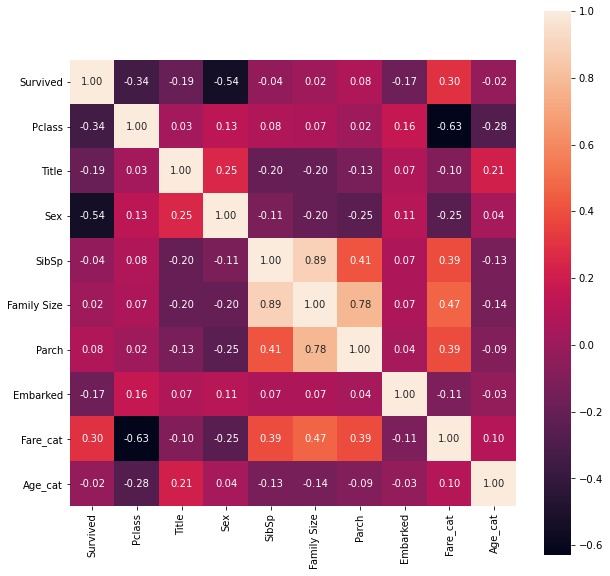

In [101]:
f, ax = plt.subplots(figsize = (10,10))
ax = sns.heatmap(corrm, annot = True, square = True, fmt = ".2f")
plt.show()

The highly negative correlated features was between Sex and Survived, while the highly positive correlated features was between SibSp, Family Size and Parch.

#### X-Data

In [102]:
X_titanic = train.drop(['PassengerId', 'Survived', 'Age', 'Age Band', 'Fare', 'Fare Band', 'Name', 'Ticket', 'Cabin'], axis = 1)
X_titanic.shape

(891, 9)

In [103]:
X_titanic.head(5)

,Pclass,Title,Sex,SibSp,Family Size,Parch,Embarked,Fare_cat,Age_cat
0,3,11,1,1,1,0,2,0,1
1,1,12,0,1,1,0,0,3,2
2,3,8,0,0,0,0,2,1,1
3,1,12,0,1,1,0,2,3,2
4,3,11,1,0,0,0,2,1,2


### Y-Data

In [104]:
Y_titanic = train['Survived']
Y_titanic.shape

(891,)

In [105]:
Y_titanic.head(5)

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

#### 5.1 Train and Test Data

In [106]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_titanic, Y_titanic,random_state=123, test_size=0.2)

In [107]:
Xtrain.shape

(712, 9)

In [108]:
Xtest.shape

(179, 9)

#### 5.1.1 Logistic Regression

In [109]:
logreg = LogisticRegression()

In [110]:
logreg.fit(Xtrain, ytrain)  

LogisticRegression()

In [111]:
y_logreg = logreg.predict(Xtest)  

In [112]:
y_logreg

array([1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0], dtype=int64)

In [113]:
from sklearn.metrics import accuracy_score
acc_logreg = accuracy_score(ytest, y_logreg)
acc_logreg

0.8268156424581006

#### Correlation Coefficient

In [114]:
coefficient = DataFrame(train.columns.delete(0))

In [115]:
coefficient.columns = ["Features"]
coefficient["Coefficient Estimate"] = pd.Series(logreg.coef_[0])

In [116]:
coefficient.sort_values(by = "Coefficient Estimate", ascending = False)

,Features,Coefficient Estimate
7,Family Size,0.277519
5,Age,0.101826
1,Pclass,-0.117422
4,Sex,-0.149939
6,SibSp,-0.161455
8,Parch,-0.240013
3,Name,-0.251765
0,Survived,-0.741149
2,Title,-2.459831
9,Ticket,NaN


In [117]:
logreg.coef_

array([[-0.74114903, -0.11742209, -2.45983105, -0.25176532, -0.14993917,
         0.10182615, -0.16145491,  0.27751868, -0.24001329]])

#### 5.1.2 Support Vector Machine (SVM) Classification

In [118]:
svc = SVC()

In [119]:
svc.fit(Xtrain, ytrain)  

SVC()

In [120]:
y_svc = svc.predict(Xtest)  

In [121]:
y_svc

array([1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0], dtype=int64)

In [122]:
acc_svc = accuracy_score(ytest, y_svc)
acc_svc

0.8379888268156425

#### 5.1.3 Random Forest

In [123]:
rf = RandomForestClassifier(n_estimators=100)

In [124]:
rf.fit(Xtrain, ytrain)  

RandomForestClassifier()

In [125]:
y_rf = rf.predict(Xtest)

In [126]:
y_rf

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0], dtype=int64)

In [127]:
acc_rf = accuracy_score(ytest, y_rf)
acc_rf

0.8324022346368715

#### 5.1.4 Decision Tree

In [128]:
dt = DecisionTreeClassifier()

In [129]:
dt.fit(Xtrain, ytrain)

DecisionTreeClassifier()

In [130]:
y_dt = dt.predict(Xtest)

In [131]:
y_dt

array([1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0], dtype=int64)

In [132]:
acc_dt = accuracy_score(ytest, y_dt)
acc_dt

0.8212290502793296

#### 5.1.5 k-Nearest Neighbor

In [133]:
knn = KNeighborsClassifier(n_neighbors = 3)

In [134]:
knn.fit(Xtrain, ytrain)

KNeighborsClassifier(n_neighbors=3)

In [135]:
y_knn = knn.predict(Xtest)

In [136]:
y_knn

array([1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0], dtype=int64)

In [137]:
acc_knn = accuracy_score(ytest, y_knn)
acc_knn

0.8156424581005587

#### 5.1.6 Gaussian Naive Bayes

In [138]:
gaussian = GaussianNB()

In [139]:
gaussian.fit(Xtrain, ytrain)

GaussianNB()

In [140]:
y_gaussian = gaussian.predict(Xtest)

In [141]:
y_gaussian

array([1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0], dtype=int64)

In [142]:
acc_gaussian = accuracy_score(ytest, y_gaussian)
acc_gaussian

0.7821229050279329

#### Comparison between the models

In [143]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes','Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_logreg, 
              acc_rf, acc_gaussian, acc_dt]})
models.sort_values(by='Score', ascending = False)

,Model,Score
0,Support Vector Machines,0.837989
3,Random Forest,0.832402
2,Logistic Regression,0.826816
5,Decision Tree,0.821229
1,KNN,0.815642
4,Naive Bayes,0.782123


Train-test-split method often lead to bias since there might be more important data that have not been considered in the training stage.

#### 5.2 Cross Validation

Cross validation method is commonly used to build the model. It could reduce biasness as every observation from the original dataset has the chance of appearing in training and test set.

In [144]:
classifiers = ["Random Forest", "SVM", "Decision Tree", "KNN", "Logistic Regression", "Naive Bayes"]

In [145]:
models = [RandomForestClassifier(), SVC(), DecisionTreeClassifier(), KNeighborsClassifier(n_neighbors = 3), LogisticRegression(), GaussianNB()]

In [146]:
accuracy = []
mean = []
std = []

In [147]:
for i in models:
    model = i
    result = cross_val_score(model, X_titanic, Y_titanic, cv = 10, scoring = "accuracy")
    accuracy.append(result)
    mean.append(result.mean())
    std.append(result.std())

In [148]:
models_df = pd.DataFrame({"CV Mean":mean, "Std":std}, index = classifiers)

In [149]:
models_df.sort_values("CV Mean", ascending = False)

,CV Mean,Std
SVM,0.817066,0.029699
Random Forest,0.813745,0.044999
Decision Tree,0.793521,0.033186
Logistic Regression,0.792372,0.022564
KNN,0.780062,0.037724
Naive Bayes,0.771061,0.036178


Train-test-split and cross-validation methods have shown that SVM has the highest accuracy compared to the others. Here, SVM has the accuracy of 82% with deviation of +- 2.9%.

#### 5.3 Confusion Matrix

Confusion matrix is used to validate the models that have been built. It will validate the models by comparing accuracy generated in the matrix to the accuracy generated in cross-validation.

#### 5.3.1 SVM

In [150]:
ypred_svm = cross_val_predict(SVC(), X_titanic, Y_titanic, cv = 10)

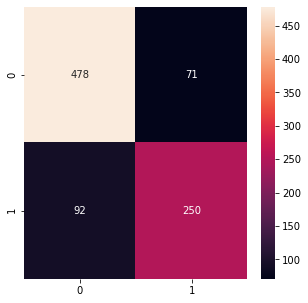

In [151]:
fig, ax = plt.subplots(figsize = (5,5))
svm_hm = sns.heatmap(confusion_matrix(Y_titanic, ypred_svm), ax = ax, annot = True, fmt = "2.0f")

#### 5.3.2 KNN

In [152]:
ypred_knn = cross_val_predict(KNeighborsClassifier(n_neighbors = 3), X_titanic, Y_titanic, cv = 10)

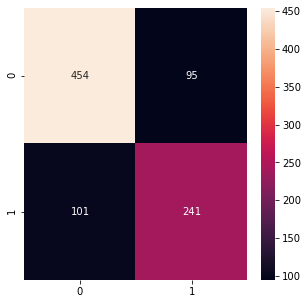

In [153]:
fig, ax = plt.subplots(figsize = (5,5))
knn_hm = sns.heatmap(confusion_matrix(Y_titanic, ypred_knn), ax = ax, annot = True, fmt = "2.0f")

#### 5.3.3 Random Forest

In [154]:
ypred_rf = cross_val_predict(RandomForestClassifier(), X_titanic, Y_titanic, cv = 10)

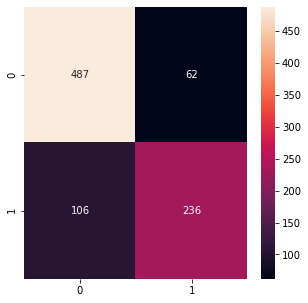

In [155]:
fig, ax = plt.subplots(figsize = (5,5))
rf_hm = sns.heatmap(confusion_matrix(Y_titanic, ypred_rf), ax = ax, annot = True, fmt = "2.0f")

#### 5.3.4 Decision Tree

In [156]:
ypred_dt = cross_val_predict(DecisionTreeClassifier(), X_titanic, Y_titanic, cv = 10)

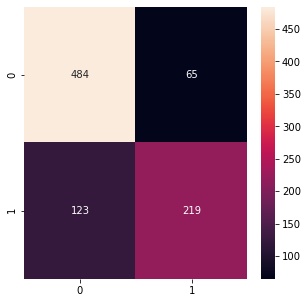

In [157]:
fig, ax = plt.subplots(figsize = (5,5))
dt_hm = sns.heatmap(confusion_matrix(Y_titanic, ypred_dt), ax = ax, annot = True, fmt = "2.0f")

#### 5.3.5 Logistic Regression

In [158]:
ypred_logreg = cross_val_predict(LogisticRegression(), X_titanic, Y_titanic, cv = 10)

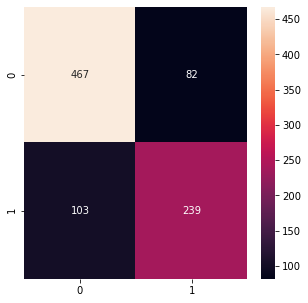

In [159]:
fig, ax = plt.subplots(figsize = (5,5))
logreg_hm = sns.heatmap(confusion_matrix(Y_titanic, ypred_logreg), ax = ax, annot = True, fmt = "2.0f")

#### 5.3.6 Naive Bayes

In [160]:
ypred_nb= cross_val_predict(GaussianNB(), X_titanic, Y_titanic, cv = 10)

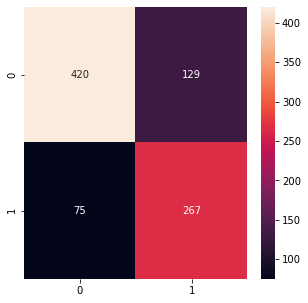

In [161]:
fig, ax = plt.subplots(figsize = (5,5))
nb_hm = sns.heatmap(confusion_matrix(Y_titanic, ypred_nb), ax = ax, annot = True, fmt = "2.0f")

Text(0.5, 1.0, ' CM for NaiveBayes')

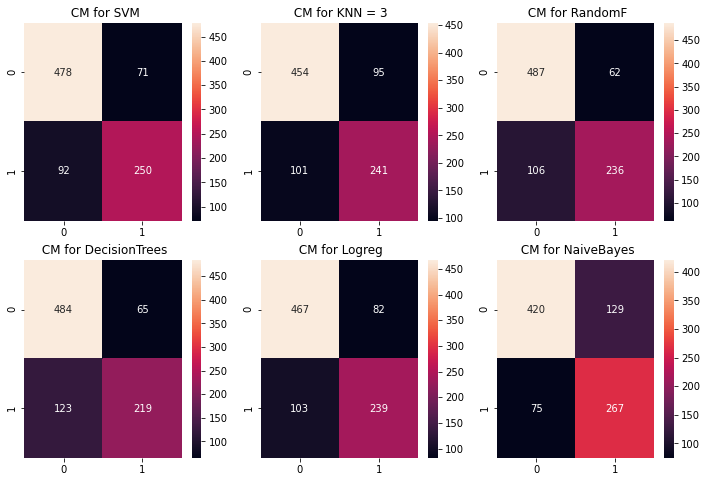

In [162]:
fig, ax = plt.subplots(2,3, figsize = (12,8))
svm_hm = sns.heatmap(confusion_matrix(Y_titanic, ypred_svm), ax = ax[0,0], annot = True, fmt = "2.0f")
ax[0,0].set_title(" CM for SVM")

knn_hm = sns.heatmap(confusion_matrix(Y_titanic, ypred_knn), ax = ax[0,1], annot = True, fmt = "2.0f")
ax[0,1].set_title(" CM for KNN = 3")

rf_hm = sns.heatmap(confusion_matrix(Y_titanic, ypred_rf), ax = ax[0,2], annot = True, fmt = "2.0f")
ax[0,2].set_title(" CM for RandomF")

dt_hm = sns.heatmap(confusion_matrix(Y_titanic, ypred_dt), ax = ax[1,0], annot = True, fmt = "2.0f")
ax[1,0].set_title(" CM for DecisionTrees")

logreg_hm = sns.heatmap(confusion_matrix(Y_titanic, ypred_logreg), ax = ax[1,1], annot = True, fmt = "2.0f")
ax[1,1].set_title(" CM for Logreg")

nb_hm = sns.heatmap(confusion_matrix(Y_titanic, ypred_nb), ax = ax[1,2], annot = True, fmt = "2.0f")
ax[1,2].set_title(" CM for NaiveBayes")

SVM, 480 (True positive) + 249 (True Negative) / 891 (Total) = 0.8182, the same as predicted value in CV Mean of cross-validation.

SVM predicted for 69 dead passengers to survived and 93 survived passengers to be dead. 

Based on the matrixes, Random Forest has higher chance in correctly predicting dead passengers and Naive Bayes has higher chance in correctly predicting survived passengers.

#### Hyper-Parameters Tuning

In [171]:
models_df.sort_values("CV Mean", ascending = False)

,CV Mean,Std
SVM,0.817066,0.029699
Random Forest,0.813745,0.044999
Decision Tree,0.793521,0.033186
Logistic Regression,0.792372,0.022564
KNN,0.780062,0.037724
Naive Bayes,0.771061,0.036178


#### 1. SVM

In [168]:
C=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
gamma=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
hyper={'C':C,'gamma':gamma}
gd=GridSearchCV(estimator=SVC(),param_grid=hyper,verbose=True)
gd.fit(X_titanic,Y_titanic)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.82712949595129
SVC(C=1, gamma=0.1)


[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:   18.2s finished


The best score for svm was 82.71% with C = 1 and gamma = 0.1, where previously calculated by CV Mean was 81.71%.

#### 2. Random Forest

In [172]:
n_estimators=range(100,1000,100)
hyper={'n_estimators':n_estimators}
gd=GridSearchCV(estimator=RandomForestClassifier(),param_grid=hyper,verbose=True)
gd.fit(X_titanic,Y_titanic)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:   50.8s finished


0.817079907099366
RandomForestClassifier(n_estimators=300)


The best score for random forest was 81.71% with n_estimators = 300, where previously calculated by CV Mean was 81.37%.

#### Feature Importance

Let's take a look which features contribute to the highest importance in Random Forest model.

In [163]:
importances = pd.DataFrame({'feature':X_titanic.columns,'importance':np.round(rf.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(15)

,importance
feature,
Sex,0.255
Title,0.168
Age_cat,0.128
Pclass,0.123
Fare_cat,0.106
Family Size,0.078
Embarked,0.058
SibSp,0.050
Parch,0.034


Embarked, SibSp and Parch have the least importance (or contribution) towards data modeling. Therefore, these features will be dropped in order to further evaluate the random forest accuracy.

In [188]:
X_titanic = train.drop(['PassengerId', 'Survived', 'Name', 'Age', 'Age Band', 'Fare', 'Fare Band', 'Name', 'Ticket', 'Cabin', 'SibSp', 'Parch'], axis = 1)
X_titanic.shape

(891, 7)

In [189]:
X_titanic.head(3)

,Pclass,Title,Sex,Family Size,Embarked,Fare_cat,Age_cat
0,3,11,1,1,2,0,1
1,1,12,0,1,0,3,2
2,3,8,0,0,2,1,1


In [190]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X_titanic, Y_titanic,random_state=123, test_size=0.2)

In [191]:
rf = RandomForestClassifier(n_estimators = 100)

In [192]:
rf.fit(Xtrain, ytrain)  

RandomForestClassifier()

In [193]:
y_rf = rf.predict(Xtest)

In [194]:
acc_rf = accuracy_score(ytest, y_rf)
acc_rf

0.8268156424581006

The data was neither overfit or underfit since the accuracy was almost the same as previous.